In [ ]:
from sage.all import sigma, nth_prime
import pickle
import ast

def nieburTau(n):
    def step1(n, k):
        return 35*k^4 - 52*k^3*n + 18*k^2*n^2
    def step2(n, k):
        return sigma(k) * sigma(n - k)
    def step3(n):
        ans = 0
        for k in range(1, n):
            ans += step1(n, k) * step2(n, k)
        return 24*ans
    return n^4 * sigma(n) - step3(n)

def h(n): 
    return nieburTau(n)


j_list=[0,1] 
for n in [2..299]:
    print("making j_list",n)

    partial_sum=0
    for r in [1..n-1]:
        partial_sum=partial_sum+j_list[r]*h(n-r) 
    
    j_n=n*h(n)-partial_sum #per lemma 2.2
    j_list.append(j_n)
    
with open('/Users/barrybrent/data/run3oct25no17.txt', 'wb') as wfile:
    pickle.dump(j_list, wfile) #output snipped

In [5]:
import pickle
with open('/Users/barrybrent/data/run3oct25no17.txt', 'rb') as rfile:
    j_list = pickle.load(rfile) #tau companion fn
print(j_list[:20]);
len(j_list)

[0, 1, -49, 829, -8145, 66011, -583645, 5566247, -51805777, 472068856, -4328346539, 39918824694, -367556533245, 3378963945150, -31075994661943, 285925175720744, -2630468958415313, 24197120941582316, -222590212400602120, 2047679712362926685]


300

(2, 0, 1)
(3, 0, -1)
(4, 0, -1)
(5, 0, 0)
(6, 0, -1)
(7, 0, 1)
(8, 0, -1)
(9, 0, 0)
(10, 0, 0)
(11, 0, 1)
(12, 0, -1)
(13, 0, 0)
(14, 0, -1)
(15, 0, 1)
(16, 0, 1)
(17, 0, 0)
(18, 0, -1)
(19, 0, 0)
(20, 0, -1)
(21, 0, 0)
(22, 0, 1)
(23, 0, 1)
(24, 0, -1)
(25, 0, 0)
(26, 0, 0)
(27, 0, 1)
(28, 0, 0)
(29, 0, 0)
(30, 0, -1)
(31, 0, -1)
(32, 0, -1)
(33, 0, 0)
(34, 0, 1)
(35, 0, 1)
(36, 0, 1)
(37, 0, 0)
(38, 0, -1)
(39, 0, 1)
(40, 0, 1)
(41, 0, 0)
(42, 0, -1)
(43, 0, -1)
(44, 0, -1)
(45, 0, 0)
(46, 0, 0)
(47, 0, 1)
(48, 0, -1)
(49, 0, 0)
MINIMUM MODULI


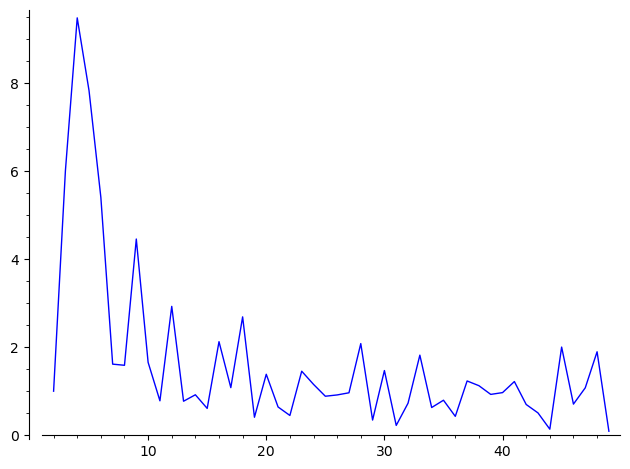

LOGS MINIMUM MODULI


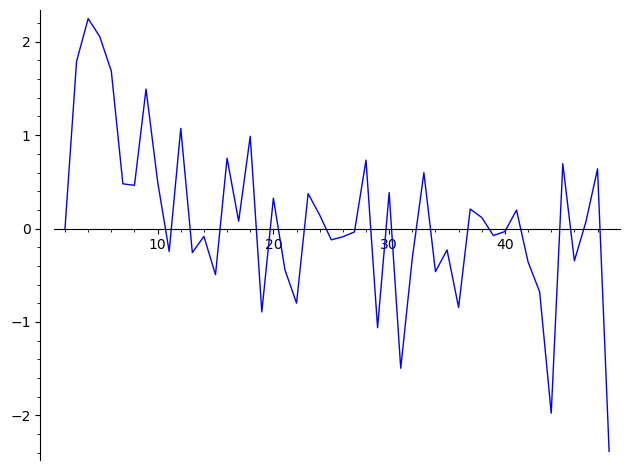

MAXIMUM MODULI


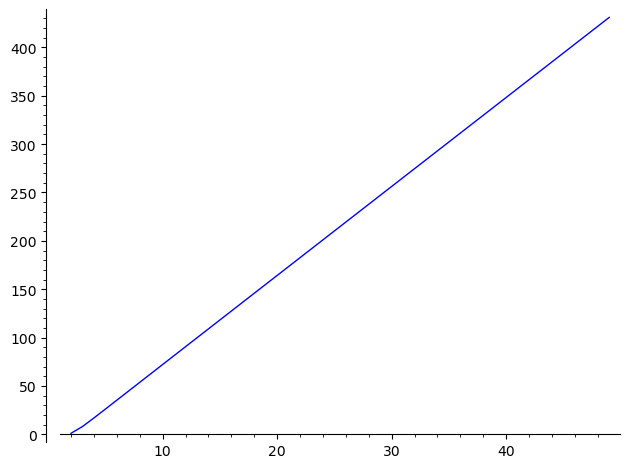

LOGS MAXIMUM MODULI


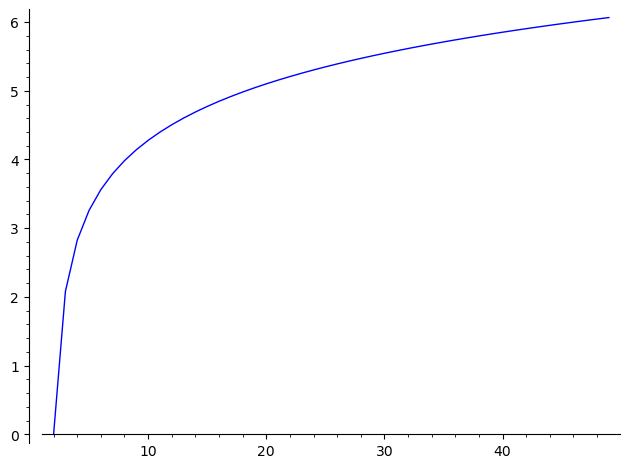

tests:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [22]:
def P_matrix(lst):
    lenlist=len(lst)
    columns=[lst]
    for k in range(1,lenlist):
        column=[0]*(k-1)
        column=column+[-k]
        column=flatten(column+[lst])
        column=column+[lst]
        column=column[:lenlist]
        columns+=[column]
    return (matrix(columns)).transpose()

import pickle
with open('/Users/barrybrent/data/run3oct25no17.txt', 'rb') as rfile: # tau j-companion
    j_list = pickle.load(rfile) # no deformation
from sage.all import *
precision_bits = 100
CIF = ComplexIntervalField(precision_bits)
x = polygen(QQ)  # Can remain in preamble if all polynomials are in one variable
matrix_list=[]
charpol_list=[]
roots_list=[]
aar_list=[]
centers_list=[]
max_diameter_list=[]
mins_list=[]
log_mins_list=[]
maxes_list=[]
log_maxes_list=[]
dets=[]
tests=[]
for n in range(2,50):
    lst=j_list[1:n]
    inpt=[j for j in lst]
    pl=P_matrix(inpt)
    det=pl.det()
    test=det-nieburTau(n-1)*factorial(n-1)
    tests.append(test)
    print((n,test,moebius(n-1)))
    dets.append((n,det))
    matrix_list+=[(n,pl)]
    cp=pl.charpoly()
    charpol_list+=[(n,cp)]
    roots = cp.roots(ring=CIF, multiplicities=False)       
    roots_list+=[(n,roots)]
    centers=[r.center() for r in roots]
    pairs = [(z.real(), z.imag()) for z in centers]


    centers_list+=[(n,centers)]
    max_diameter=max([r.diameter() for r in roots])
    max_diameter_list+=[(n,max_diameter)]
    aar = [r.abs() for r in roots]
    aar_list+=[(n,aar)]
    # compute absolute value for each root (before any conversion)
    if aar!=[]:
        minn = min(aar)  
        mins_list+=[(n,minn)]
        mins_list.append((n,minn))
        if minn>0:
            log_minn=log(minn)
        log_mins_list.append((n,log_minn))
        maxx = max(aar)  
        maxes_list+=[(n,maxx)]
        maxes_list.append((n,maxx))
        if maxx>0:
            log_maxx=log(maxx)
            log_maxes_list.append((n,log_maxx))
   
    
p = list_plot(mins_list, plotjoined=True, axes_labels=['', ''])
print("MINIMUM MODULI")
p.show()
p = list_plot(log_mins_list, plotjoined=True, axes_labels=['', ''])
print("LOGS MINIMUM MODULI")
p.show()
p = list_plot(maxes_list, plotjoined=True, axes_labels=['', ''])
print("MAXIMUM MODULI")
p.show()
p = list_plot(log_maxes_list, plotjoined=True, axes_labels=['', ''])
print("LOGS MAXIMUM MODULI")
p.show()
print("tests:")
print(tests) 

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
MINIMUM MODULI


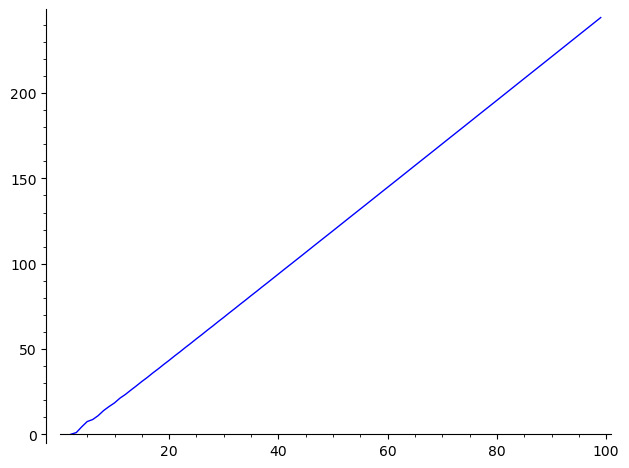

LOGS MINIMUM MODULI


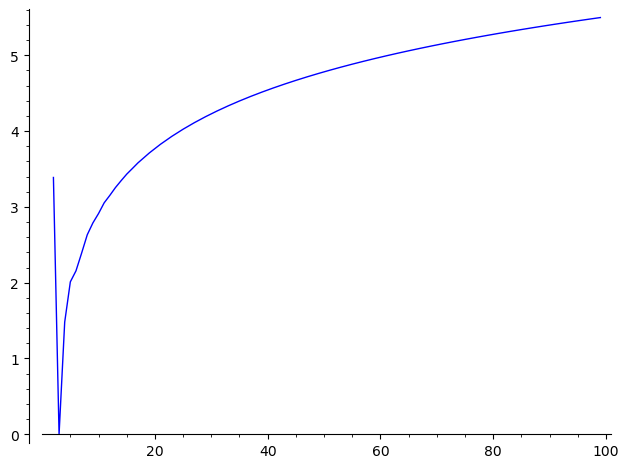

MAXIMUM MODULI


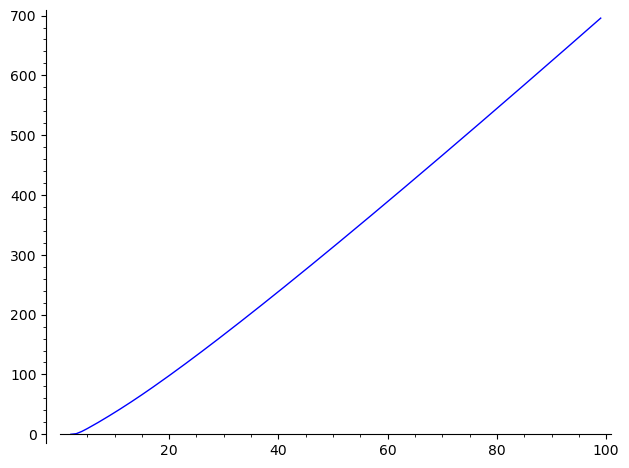

LOGS MAXIMUM MODULI


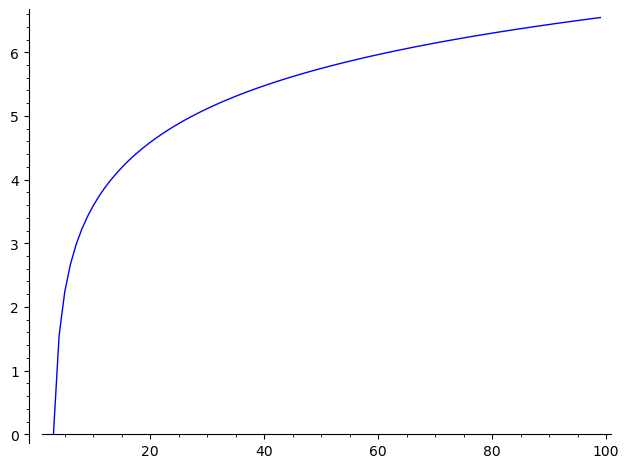

In [20]:
def P_matrix(lst):
    lenlist=len(lst)
    columns=[lst]
    for k in range(1,lenlist):
        column=[0]*(k-1)
        column=column+[-k]
        column=flatten(column+[lst])
        column=column+[lst]
        column=column[:lenlist]
        columns+=[column]
    return (matrix(columns)).transpose()

from sage.all import sigma, nth_prime
import pickle
import ast


with open('/Users/barrybrent/data/run3oct25no17.txt', 'rb') as rfile: #tau j-companion
    j_list = pickle.load(rfile)
j_list=[1]+j_list  #<<<<< deformation
from sage.all import *
precision_bits = 100
CIF = ComplexIntervalField(precision_bits)
x = polygen(QQ)  # Can remain in preamble if all polynomials are in one variable
matrix_list=[]
charpol_list=[]
roots_list=[]
aar_list=[]
centers_list=[]
max_diameter_list=[]
mins_list=[]
log_mins_list=[]
maxes_list=[]
log_maxes_list=[]
dets=[]
tests=[]
for n in range(2,100):
    lst=j_list[1:n]
    inpt=[j for j in lst]
    pl=P_matrix(inpt)
    det=pl.det()
    test=det-moebius(n-1)*factorial(n-1)
    tests.append(test)
    #print((n,test,moebius(n-1)))
    print(n)
    dets.append((n,det))
    matrix_list+=[(n,pl)]
    cp=pl.charpoly()
    charpol_list+=[(n,cp)]
    roots = cp.roots(ring=CIF, multiplicities=False)       
    roots_list+=[(n,roots)]
    centers=[r.center() for r in roots]
    pairs = [(z.real(), z.imag()) for z in centers]


    centers_list+=[(n,centers)]
    max_diameter=max([r.diameter() for r in roots])
    max_diameter_list+=[(n,max_diameter)]
    aar = [r.abs() for r in roots]
    aar_list+=[(n,aar)]
    # compute absolute value for each root (before any conversion)
    if aar!=[]:
        minn = min(aar)  
        mins_list+=[(n,minn)]
        mins_list.append((n,minn))
        if minn>0:
            log_minn=log(minn)
        log_mins_list.append((n,log_minn))
        maxx = max(aar)  
        maxes_list+=[(n,maxx)]
        maxes_list.append((n,maxx))
        if maxx>0:
            log_maxx=log(maxx)
            log_maxes_list.append((n,log_maxx))
   
    
p = list_plot(mins_list, plotjoined=True, axes_labels=['', ''])
print("MINIMUM MODULI")
p.show()
p = list_plot(log_mins_list, plotjoined=True, axes_labels=['', ''])
print("LOGS MINIMUM MODULI")
p.show()
p = list_plot(maxes_list, plotjoined=True, axes_labels=['', ''])
print("MAXIMUM MODULI")
p.show()
p = list_plot(log_maxes_list, plotjoined=True, axes_labels=['', ''])
print("LOGS MAXIMUM MODULI")
p.show()

In [ ]:
from sage.all import sigma, nth_prime
import pickle
import ast

def nieburTau(n):
    def step1(n, k):
        return 35*k^4 - 52*k^3*n + 18*k^2*n^2
    def step2(n, k):
        return sigma(k) * sigma(n - k)
    def step3(n):
        ans = 0
        for k in range(1, n):
            ans += step1(n, k) * step2(n, k)
        return 24*ans
    return n^4 * sigma(n) - step3(n)

def h(n): 
    return nieburTau(nth_prime(n)) # i.e., tauPrime(n)


j_list=[0,1] 
for n in [2..299]:
    print("making j_list",n)

    partial_sum=0
    for r in [1..n-1]:
        partial_sum=partial_sum+j_list[r]*h(n-r) 
    
    j_n=n*h(n)-partial_sum #per lemma 2.2
    j_list.append(j_n)
    
with open('/Users/barrybrent/data/run3oct25no18.txt', 'wb') as wfile:
    pickle.dump(j_list, wfile) #output snipped

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
MINIMUM MODULI


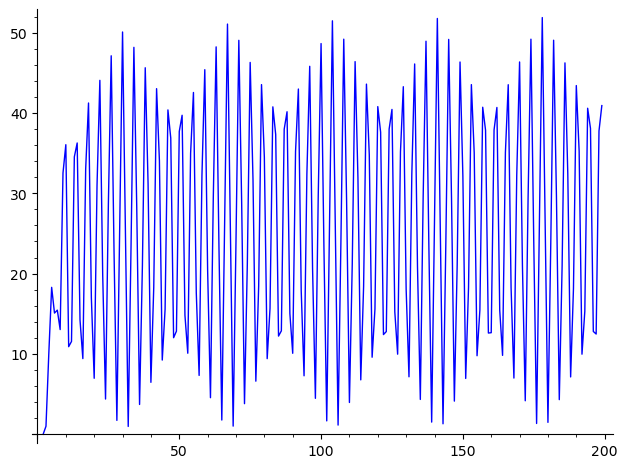

LOGS MINIMUM MODULI


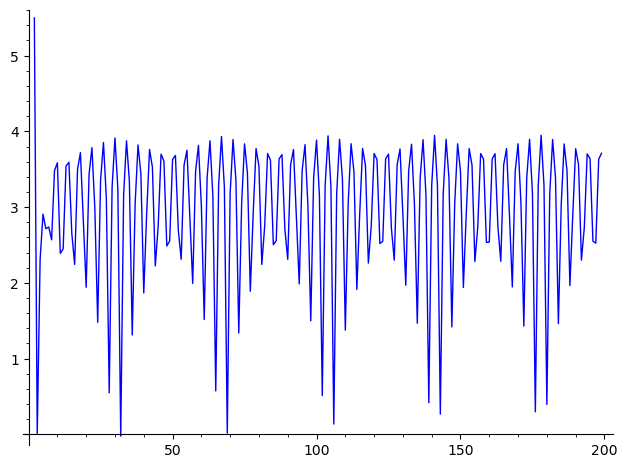

MAXIMUM MODULI


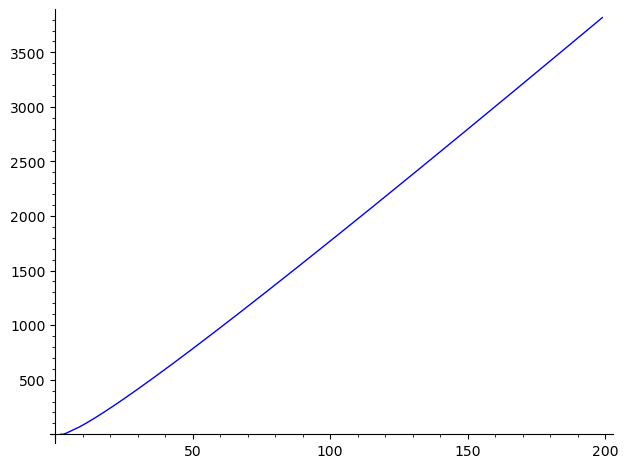

LOGS MAXIMUM MODULI


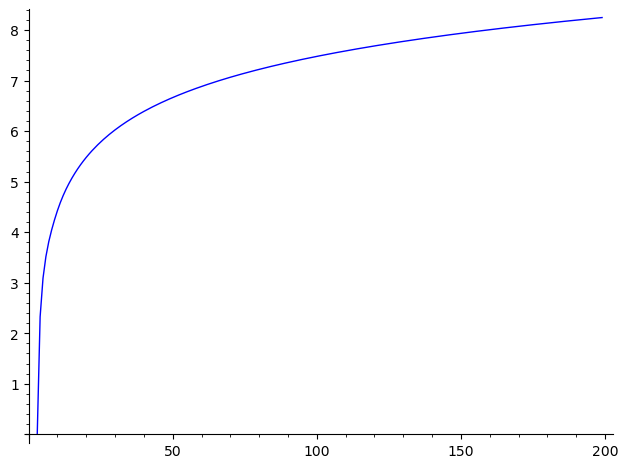

In [21]:
def P_matrix(lst):
    lenlist=len(lst)
    columns=[lst]
    for k in range(1,lenlist):
        column=[0]*(k-1)
        column=column+[-k]
        column=flatten(column+[lst])
        column=column+[lst]
        column=column[:lenlist]
        columns+=[column]
    return (matrix(columns)).transpose()

from sage.all import sigma, nth_prime
import pickle
import ast


with open('/Users/barrybrent/data/run3oct25no18.txt', 'rb') as rfile:
    j_list = pickle.load(rfile) #tauPrime(n) j-companion

j_list=[1]+j_list  #<<<<< deformation
from sage.all import *
precision_bits = 100
CIF = ComplexIntervalField(precision_bits)
x = polygen(QQ)  # Can remain in preamble if all polynomials are in one variable
matrix_list=[]
charpol_list=[]
roots_list=[]
aar_list=[]
centers_list=[]
max_diameter_list=[]
mins_list=[]
log_mins_list=[]
maxes_list=[]
log_maxes_list=[]
dets=[]
tests=[]
for n in range(2,200):
    lst=j_list[1:n]
    inpt=[j for j in lst]
    pl=P_matrix(inpt)
    det=pl.det()
    test=det-moebius(n-1)*factorial(n-1)
    tests.append(test)
    #print((n,test,moebius(n-1)))
    print(n)
    dets.append((n,det))
    matrix_list+=[(n,pl)]
    cp=pl.charpoly()
    charpol_list+=[(n,cp)]
    roots = cp.roots(ring=CIF, multiplicities=False)       
    roots_list+=[(n,roots)]
    centers=[r.center() for r in roots]
    pairs = [(z.real(), z.imag()) for z in centers]


    centers_list+=[(n,centers)]
    max_diameter=max([r.diameter() for r in roots])
    max_diameter_list+=[(n,max_diameter)]
    aar = [r.abs() for r in roots]
    aar_list+=[(n,aar)]
    # compute absolute value for each root (before any conversion)
    if aar!=[]:
        minn = min(aar)  
        mins_list+=[(n,minn)]
        mins_list.append((n,minn))
        if minn>0:
            log_minn=log(minn)
        log_mins_list.append((n,log_minn))
        maxx = max(aar)  
        maxes_list+=[(n,maxx)]
        maxes_list.append((n,maxx))
        if maxx>0:
            log_maxx=log(maxx)
            log_maxes_list.append((n,log_maxx))
   
    
p = list_plot(mins_list, plotjoined=True, axes_labels=['', ''])
print("MINIMUM MODULI")
p.show()
p = list_plot(log_mins_list, plotjoined=True, axes_labels=['', ''])
print("LOGS MINIMUM MODULI")
p.show()
p = list_plot(maxes_list, plotjoined=True, axes_labels=['', ''])
print("MAXIMUM MODULI")
p.show()
p = list_plot(log_maxes_list, plotjoined=True, axes_labels=['', ''])
print("LOGS MAXIMUM MODULI")
p.show()
with open('/Users/barrybrent/data/run3oct25no18.txt', 'wb') as wfile:
    pickle.dump(roots_list, wfile) #output snipped

with open('/Users/barrybrent/data/run3oct25no19.txt', 'wb') as wfile:
    pickle.dump(charpol_list, wfile) #output snipped

with open('/Users/barrybrent/data/run3oct25no20.txt', 'wb') as wfile:
    pickle.dump(max_diameter_list, wfile) #output snipped

with open('/Users/barrybrent/data/run3oct25no21.txt', 'wb') as wfile:
    pickle.dump(dets, wfile) #output snipped